In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('panenpadi.csv', sep=',')
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [3]:
X = df[['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']]
y = df['Produksi']

In [4]:
print(df.describe())

             Tahun      Produksi     Luas Panen  Curah hujan  Kelembapan  \
count   224.000000  2.240000e+02     224.000000   224.000000  224.000000   
mean   2006.500000  1.679701e+06  374349.966920  2452.490759   80.948705   
std       8.095838  1.161387e+06  232751.161987  1031.972625    4.878680   
min    1993.000000  4.293800e+04   63142.040000   222.500000   54.200000   
25%    1999.750000  5.488570e+05  146919.500000  1703.525000   78.975000   
50%    2006.500000  1.667773e+06  373551.500000  2315.700000   82.375000   
75%    2013.250000  2.436851e+06  514570.250000  3039.700000   84.000000   
max    2020.000000  4.881089e+06  872737.000000  5522.000000   90.600000   

       Suhu rata-rata  
count      224.000000  
mean        26.801964  
std          1.197041  
min         22.190000  
25%         26.177500  
50%         26.730000  
75%         27.200000  
max         29.850000  


In [5]:
shape = df.shape

print("Jumlah baris:", shape[0])
print("Jumlah kolom:", shape[1])

Jumlah baris: 224
Jumlah kolom: 7


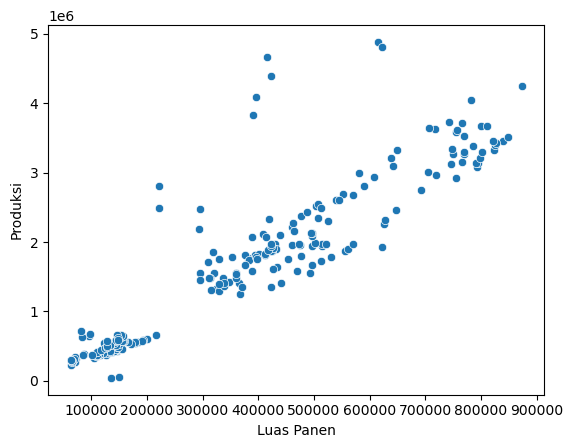

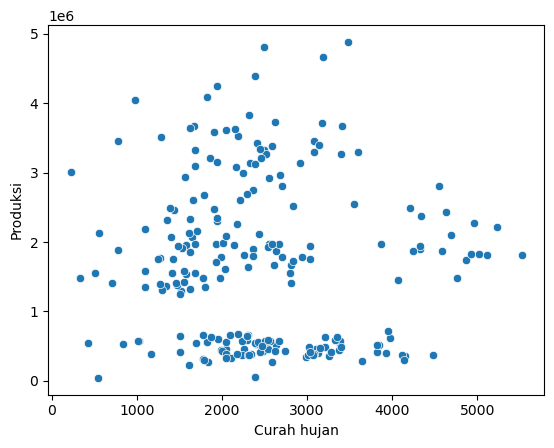

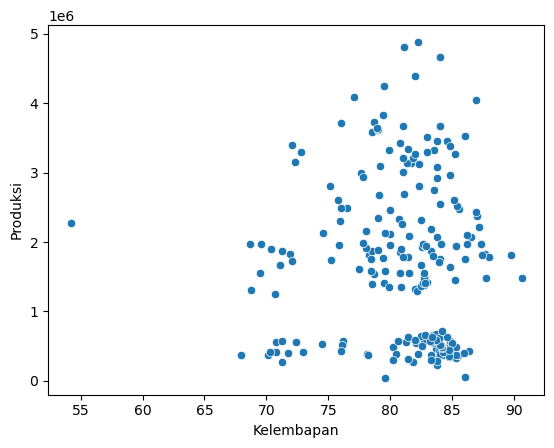

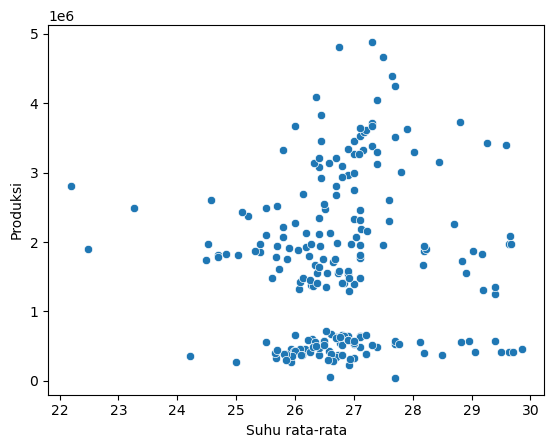

In [6]:
for column in X.columns:
    sns.scatterplot(x=column, y='Produksi', data=df)
    plt.show()

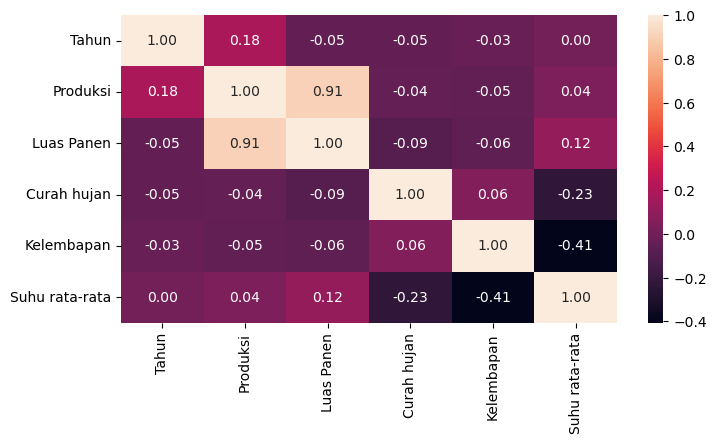

In [7]:
plt.figure(figsize=(8, 4))

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

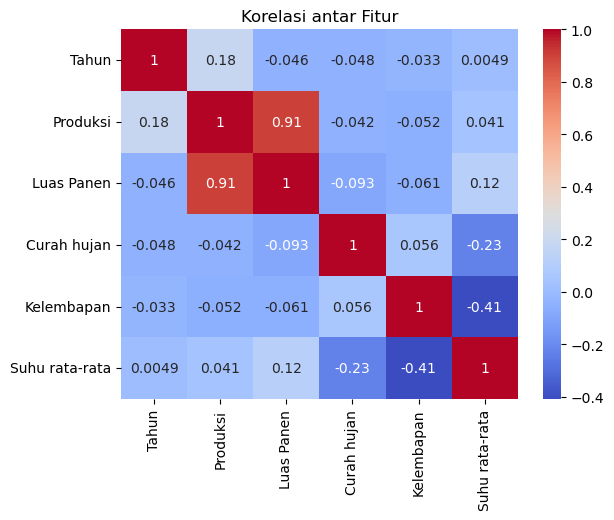

In [8]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur')
plt.show()

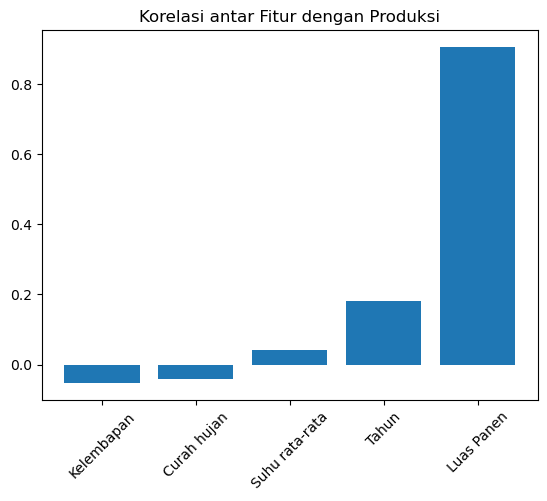

In [9]:
# Menghitung korelasi antar fitur dengan target
correlations = df.corr(numeric_only=True)['Produksi'].drop('Produksi').sort_values()

# Visualisasi korelasi antar fitur dengan target
plt.bar(correlations.index, correlations)
plt.xticks(rotation=45)
plt.title('Korelasi antar Fitur dengan Produksi')
plt.show()

In [10]:
def datates(nilai,state):
    # Pisahkan data menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=nilai, random_state=state)
    
    print(X_train.shape)
    print(y_test.shape)
    
    # Model regresi
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    
    # Mencari nilai coef dan intercept
    print('Intercept ',regr.intercept_)
    print('Coef ', regr.coef_)
    
    # Prediksi menggunakan data uji
    y_pred = regr.predict(X_test)
    
    # Evaluasi model menggunakan MSE, R-squared, dan MAE
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    pred =regr.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))
    
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("Mean Absolute Error:", mae)
    print("rmse:", rmse)

In [11]:
datates(0.2,15)

(179, 4)
(45,)
Intercept  2369329.5994851557
Coef  [ 4.59471191e+00  4.09497075e+01 -9.32990684e+03 -6.49234507e+04]
Mean Squared Error: 64231061011.81448
R-squared: 0.941170492232621
Mean Absolute Error: 199609.12232327668
rmse: 253438.47579208348


In [12]:
datates(0.3,15)

(156, 4)
(68,)
Intercept  3146922.463315217
Coef  [ 4.50699206e+00  1.72217806e+01 -1.07778014e+04 -8.61195753e+04]
Mean Squared Error: 140953970747.92422
R-squared: 0.8942462157636459
Mean Absolute Error: 246074.95033446178
rmse: 375438.37143787555


In [13]:
datates(0.4,15)

(134, 4)
(90,)
Intercept  4901291.787398978
Coef  [ 4.50538345e+00  5.06192352e+00 -2.00718086e+04 -1.22296536e+05]
Mean Squared Error: 225974915323.06332
R-squared: 0.82453639739907
Mean Absolute Error: 278219.6939688653
rmse: 475368.18922080105
